In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv("train_and_test2.csv")
print(df.tail())
print()

df.drop(df.columns[5:12], axis=1, inplace=True)
df.drop(df.columns[6:14], axis=1, inplace=True) 
df.drop(df.columns[7:9], axis=1, inplace=True)
df.drop(df.columns[8:10], axis=1, inplace=True)
df.tail()

      Passengerid   Age      Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
1304         1305  28.0    8.0500    0      0     0       0       0       0   
1305         1306  39.0  108.9000    1      0     0       0       0       0   
1306         1307  38.5    7.2500    0      0     0       0       0       0   
1307         1308  28.0    8.0500    0      0     0       0       0       0   
1308         1309  28.0   22.3583    0      1     0       0       0       0   

      zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  \
1304       0  ...        0        0        0       3        0        0   
1305       0  ...        0        0        0       1        0        0   
1306       0  ...        0        0        0       3        0        0   
1307       0  ...        0        0        0       3        0        0   
1308       0  ...        0        0        0       3        0        0   

      Embarked  zero.17  zero.18  2urvived  
1304       2.0        0        0   

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0
1308,1309,28.0,22.3583,0,1,1,3,0.0,0


In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Sex'] = df['Sex'].astype(str).str.lower() 
df.rename(columns={"2urvived":"Survived"},inplace=True)
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [7]:
df['FamilySize'] = df['sibsp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize']==1).astype(int)
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived,FamilySize,IsAlone
0,1,22.0,7.2500,0,1,0,3,2.0,0,2,False
1,2,38.0,71.2833,1,1,0,1,0.0,1,2,False
2,3,26.0,7.9250,1,0,0,3,2.0,1,1,True
3,4,35.0,53.1000,1,1,0,1,2.0,1,2,False
4,5,35.0,8.0500,0,0,0,3,2.0,0,1,True


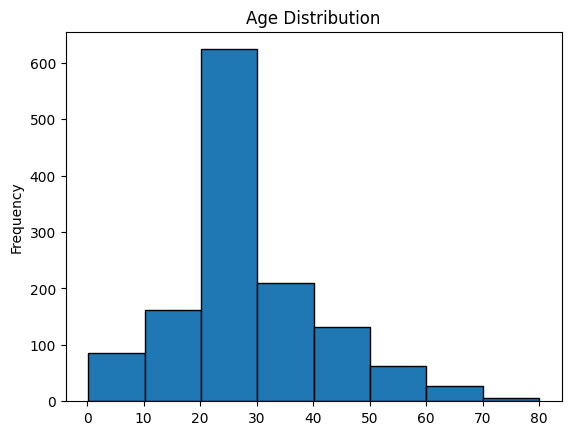

In [11]:
df['Age'].plot(kind='hist', bins=8, edgecolor='black', title='Age Distribution')
plt.show()

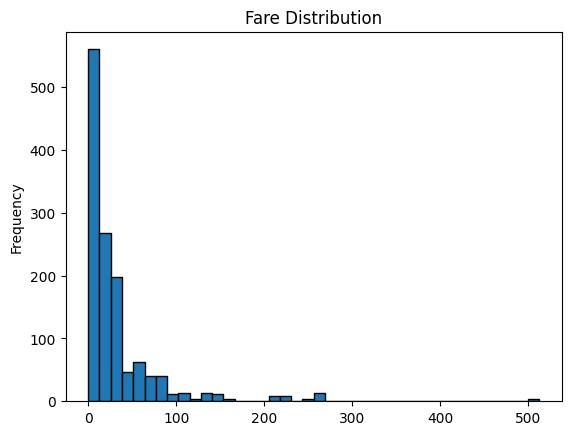

In [45]:
df['Fare'].plot(kind='hist', bins=40, edgecolor='black', title='Fare Distribution')
plt.show()

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'Sibsp', 'Parch', 'Pclass',
       'Embarked', 'Survived', 'Familysize', 'Isalone'],
      dtype='object')


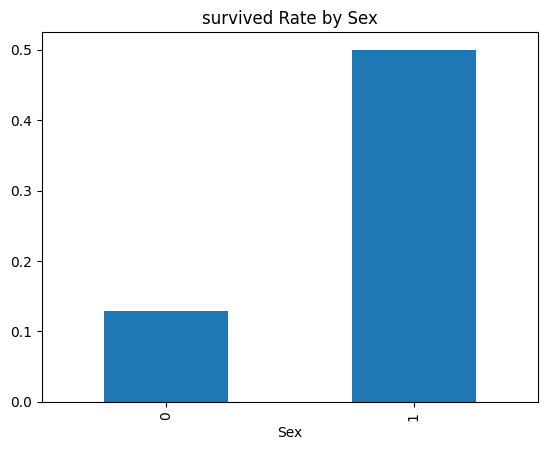

In [48]:
df.columns = df.columns.str.strip()   
df.columns = df.columns.str.capitalize()  
print(df.columns)

df.pivot_table(index='Sex', values='Survived', aggfunc='mean')['Survived'].plot(kind='bar', title='Survived Rate by Sex')
plt.show()

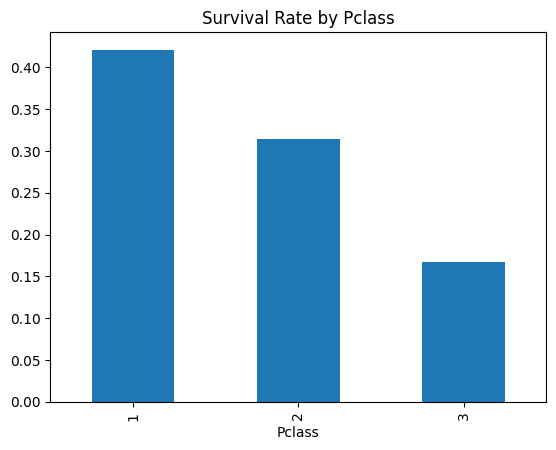

In [49]:
df.pivot_table(index='Pclass', values='Survived', aggfunc='mean')['Survived'].plot(kind='bar', title='Survival Rate by Pclass')
plt.show()

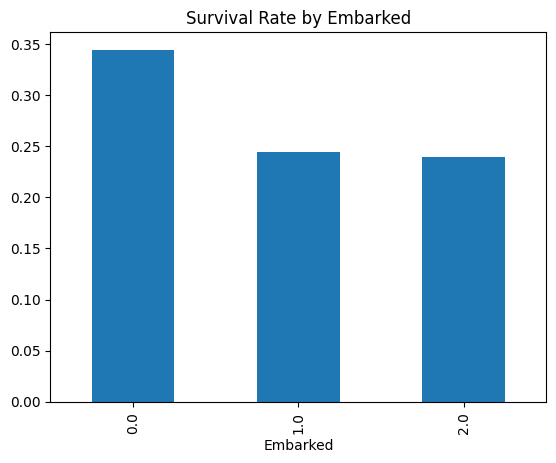

In [50]:
df.pivot_table(index='Embarked', values='Survived', aggfunc='mean')['Survived'].plot(kind='bar', title='Survival Rate by Embarked')
plt.show()

In [9]:
print('Missing values:')
print(df.isna().sum())

print('\nNumeric Summary:')
print(df.describe())

Missing values:
Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       0
Survived       0
FamilySize     0
IsAlone        0
dtype: int64

Numeric Summary:
       Passengerid          Age         Fare        sibsp        Parch  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean    655.000000    29.503186    33.281086     0.498854     0.385027   
std     378.020061    12.905241    51.741500     1.041658     0.865560   
min       1.000000     0.170000     0.000000     0.000000     0.000000   
25%     328.000000    22.000000     7.895800     0.000000     0.000000   
50%     655.000000    28.000000    14.454200     0.000000     0.000000   
75%     982.000000    35.000000    31.275000     1.000000     0.000000   
max    1309.000000    80.000000   512.329200     8.000000     9.000000   

            Pclass     Embarked     Survived   FamilySize  
count  1309.000000  1309.000000  1309.0

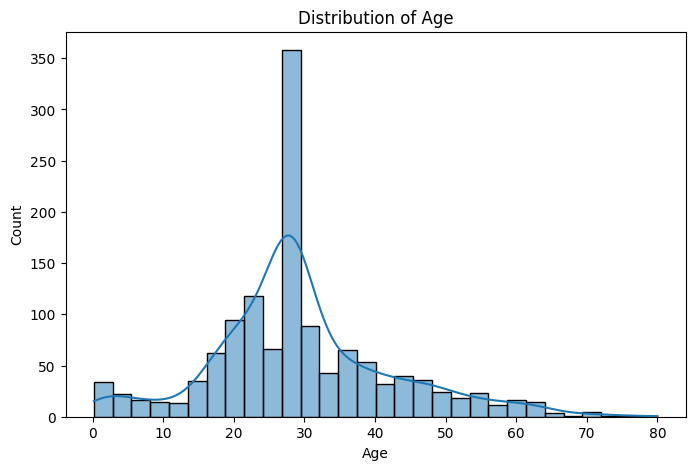

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Distribution of Age")
plt.show()

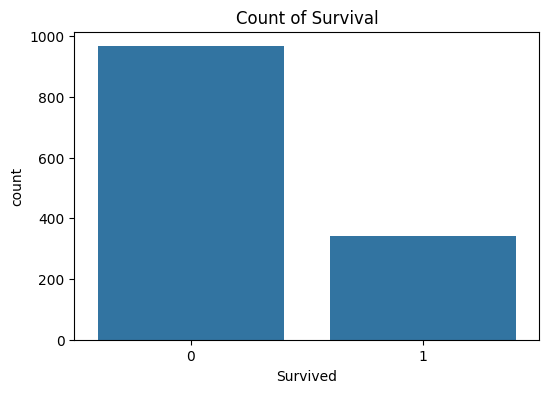

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Count of Survival")
plt.show()

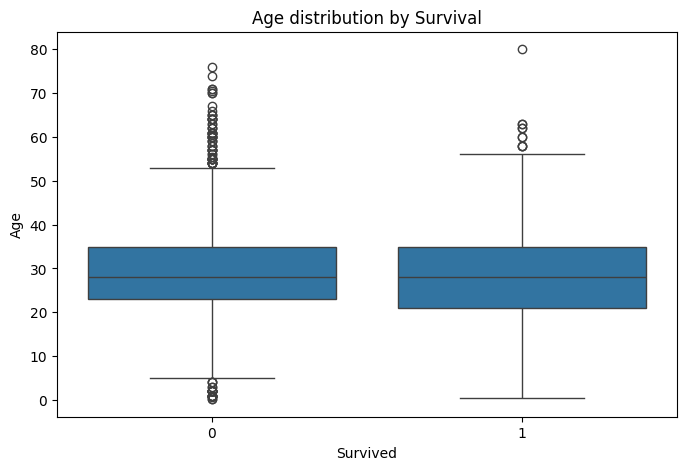

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age distribution by Survival")
plt.show()


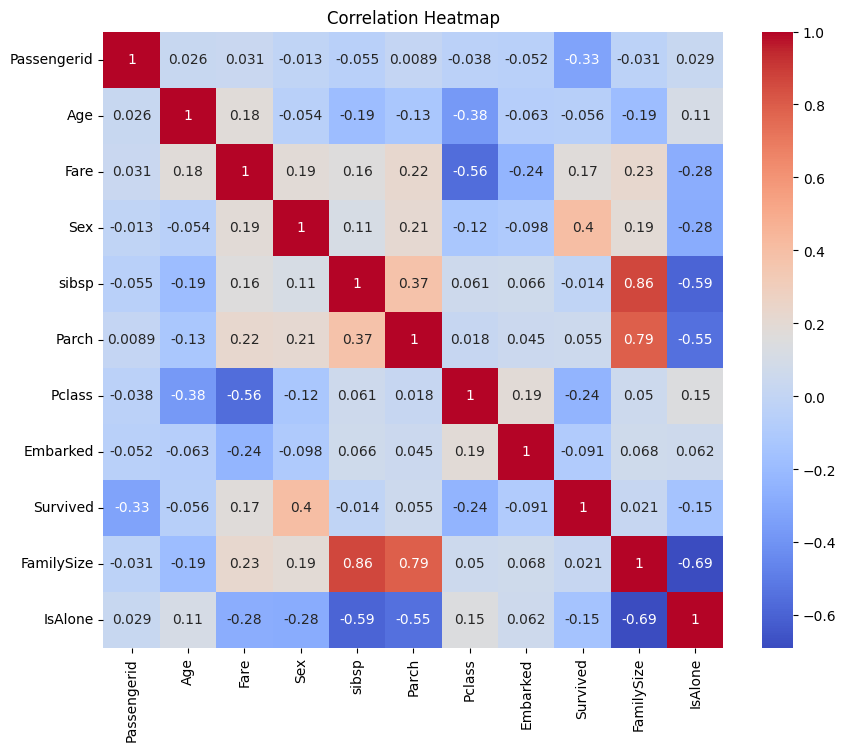

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


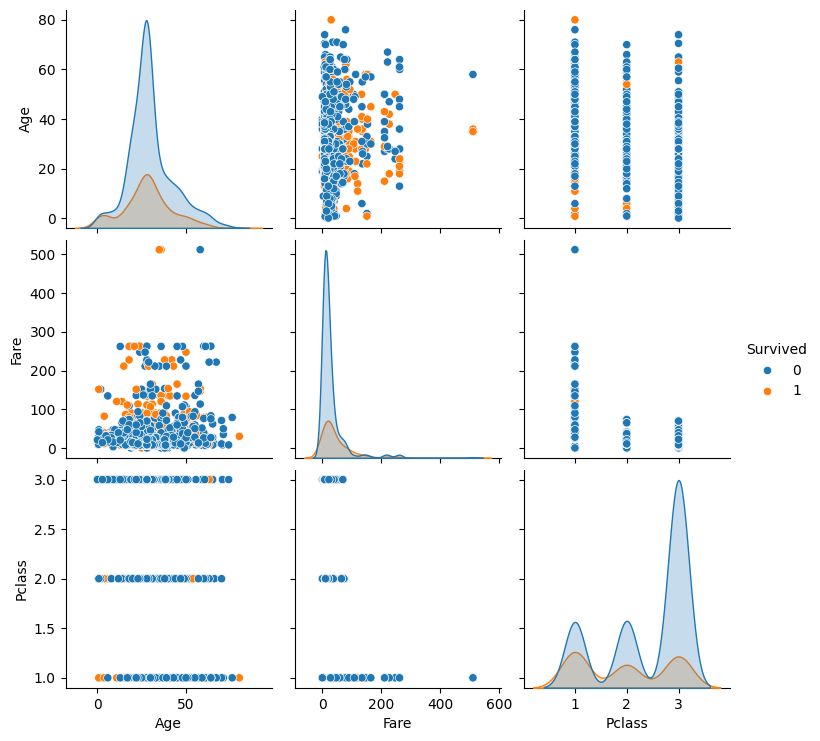

In [14]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue="Survived")
plt.show()